In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset=pd.read_csv(r"/kaggle/input/social-network-ads/Social_Network_Ads.csv")
dataset.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [21]:
dataset.drop(columns=["User ID"],inplace=True)

In [22]:
dataset.drop(columns=["Gender"],inplace=True)


In [23]:
dataset.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [24]:
x=dataset.iloc[:,:-1]
y=dataset["Purchased"]

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [30]:
dt.score(x_test,y_test)*100


90.0

In [31]:
dt.predict([[19,19000]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [32]:
from sklearn.tree import plot_tree

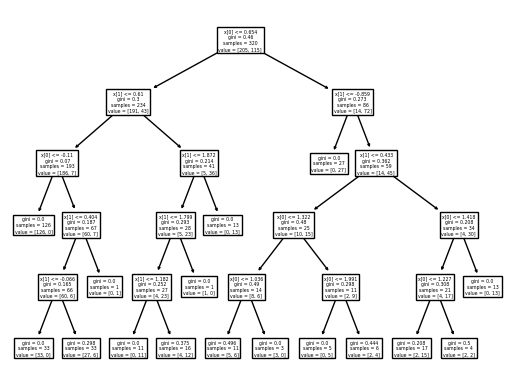

In [33]:
plot_tree(dt)
plt.show()

In [35]:
for i in range(1,20):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(x_train,y_train)
    print(dt1.score(x_train,y_train),dt.score(x_test,y_test),i)

0.821875 0.9 1
0.91875 0.9 2
0.91875 0.9 3
0.93125 0.9 4
0.934375 0.9 5
0.95 0.9 6
0.96875 0.9 7
0.971875 0.9 8
0.98125 0.9 9
0.984375 0.9 10
0.990625 0.9 11
0.990625 0.9 12
0.99375 0.9 13
0.996875 0.9 14
0.996875 0.9 15
0.996875 0.9 16
0.996875 0.9 17
0.996875 0.9 18
0.996875 0.9 19
